<a href="https://colab.research.google.com/github/YashSharma79/gradient_descent_from_scratch/blob/main/gradient_descent_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The matrix contains values with normal distribution and variance 1. For a matrix to be non-invertible, its determinant must be 0. The values in normal distribution are unlikely (concluded after several tries of code) to yield a matrix with determinant 0.

The additional complexity is not worth the improvement in error reduction in this case.

The form of error decay does not change with a variable step size function as seen in the graph.

The package numpy uses LU decomposition to calculate the inverse of matrix as found here at https://github.com/numpy/numpy/blob/main/numpy/linalg/linalg.py. 

It is of the order O(n^2.36). Source: wikipedia

Verify for a few dimensions D, for a few experimental A,k each, 

Lets take all Ks

For all ks
*   Lets take dimensions from 2 to 10
*   Lets take 5 matrices of each D 





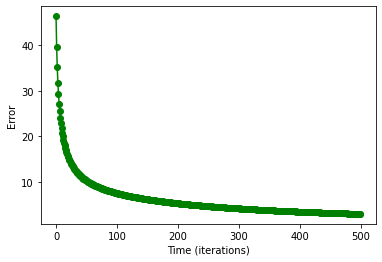

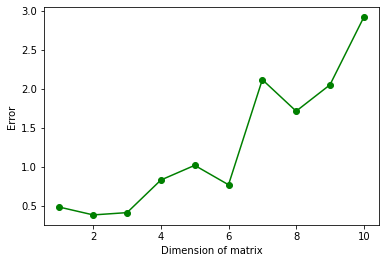

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# plotting

def plotter(valueMap, labelX, labelY):
  myList = valueMap.items()
  x, y = zip(*myList)

  plt.plot(x, y, marker = 'o', color = 'green')
  plt.xlabel(labelX)
  plt.ylabel(labelY)
  plt.show()

errorToTime = {}
errorToDimension = {}

def gradientDescent(A, v0, ek):
  vT = v0
  norm = np.linalg.norm(A @ vT.transpose() - ek, 2)
  error = norm * norm
  prevError = error
  print(error)
  vT = vT.transpose()

  alpha = 0.02
  for i in range(0, 500, 1):
    vTPlusOne = vT - alpha * ((A.transpose() @ A @ vT) -  (A.transpose() @ ek))
    vT = vTPlusOne
    norm = np.linalg.norm((A @ vT) - ek, 2)
    
    error = norm * norm

    if i not in errorToTime:
      errorToTime[i] = 0

    meanError = (errorToTime[i] + error) / 2
    errorToTime[i] = meanError

  print(error)
  #print(vT)
  return error

def variableGradientDescent(A, v0, ek):
  vT = v0
  norm = np.linalg.norm(A @ vT.transpose() - ek, 2)
  error = norm * norm
  prevError = error
  #print(error)
  vT = vT.transpose()

  alpha = 0.01
  for i in range(0, 500, 1):
    vTPlusOne = vT - alpha * ((A.transpose() @ A @ vT) -  (A.transpose() @ ek))
    vT = vTPlusOne
    norm = np.linalg.norm((A @ vT) - ek, 2)
    
    error = norm * norm

    if i not in errorToTime:
      errorToTime[i] = 0

    meanError = (errorToTime[i] + error) / 2
    errorToTime[i] = meanError
    

    alpha = alpha * (error/prevError)
    prevError = error

  #print(error)
  #print(vT)
  return error


mu, sigma = 0, 1 # mean and standard  

# lets take 10 matrices of each dimension
for D in range(1, 11, 1):
  meanErrorByD = 0
  for i in range(0, 10, 1):
    A = np.random.normal(mu, sigma, (D,D))
    #print(A)

    # Generate v0 a vector
    v0 = np.random.normal(mu, sigma, (1,D))

    for k in range(0, D, 1):
      ek = np.zeros((D,1))
      ek[k] = 1

      #error = gradientDescent(A, v0, ek)
      error = variableGradientDescent(A, v0, ek)

      meanErrorByD = (meanErrorByD + error) / 2
    
  errorToDimension[D] = meanErrorByD

plotter(errorToTime, "Time (iterations)", "Error")
plotter(errorToDimension, "Dimension of matrix", "Error")

Fixed learning rate

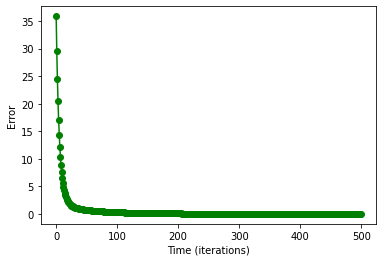

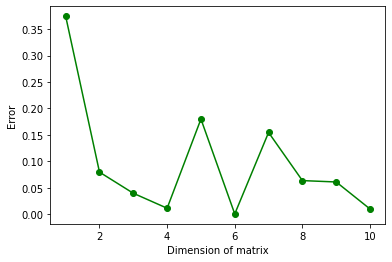

Variable error learning rate

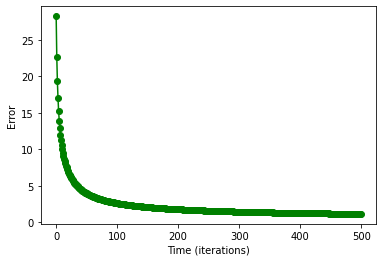

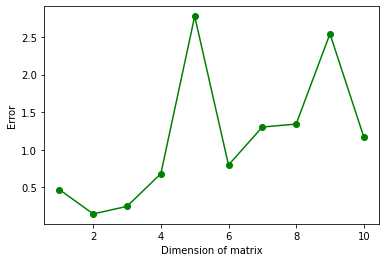